# Project 1:

## Build Decision Tree(DV-"Survived",IDV-"Age,Gender and Fare") and Prediction

## DECISION TREE

## 1.CLASSIFICATION


In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
import matplotlib as plt

In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
label_encoder=preprocessing.LabelEncoder()
encoded_sex=label_encoder.fit_transform(df["Sex"])

In [4]:
tree_model=tree.DecisionTreeClassifier()

In [5]:
predictors=pd.DataFrame([encoded_sex,df["Age"],df["Fare"]]).T

In [6]:
tree_model=tree.DecisionTreeClassifier(max_depth=6)

In [7]:
tree_model.fit(X=predictors,y=df["Survived"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
with open("traintree.dot",'w') as f:
    f=tree.export_graphviz(tree_model,feature_names=["Sex","Age","Fare"],out_file=f);

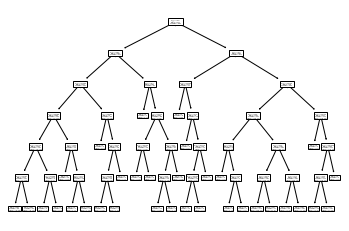

In [10]:
tree.plot_tree(tree_model);

##### finding model accuracy

In [11]:
tree_model.score(X=predictors,y=df["Survived"])

0.8267716535433071

In this train data set, survived as dependent variable and Sex,age,fare are independent variable

In this case the model accuracy is 82 percentage

# 2.PREDECTION

##### Based on the train datase,we are predicting the test data set outcome.

In [12]:
df1=pd.read_csv("test.csv")
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [13]:
new_age=np.where(df1["Age"].isnull(),28,df1["Age"])

In [14]:
df1["Age"]=new_age

In [15]:
encoded_sex=label_encoder.fit_transform(df1["Sex"])

In [16]:
test_featuers=pd.DataFrame([encoded_sex,df1["Age"],df1["Fare"]]).T

In [17]:
test_preds=tree_model.predict(X=test_featuers)

In [18]:
predicted_output=pd.DataFrame({"PassengerID":df1["PassengerId"],"Survived":test_preds})

In [20]:
predicted_output.to_csv("Ouput.csv",index=False);

###### In the Ouput.csv file we have seen that Based on the train datase,we are predicting the test data set outcome